#### In this example, we continue to drill a bit futher into the use of scikit-learn for classification, as well as the use of cross-validation for evaluation model performance.

In [1]:
import numpy as np
import pandas as pd

In [2]:
vstable = pd.read_csv("../../data/Video_Store_2.csv", index_col=0)

vstable.shape # we have 50 movies and 7 features. 

(50, 7)

In [3]:
vstable.head()

,Gender,Income,Age,Rentals,Avg Per Visit,Genre,Incidentals
Cust ID,,,,,,,
1,M,45000,25,32,2.5,Action,Yes
2,F,54000,33,12,3.4,Drama,No
3,F,32000,20,42,1.6,Comedy,No
4,F,59000,70,16,4.2,Drama,Yes
5,M,37000,35,25,3.2,Action,Yes


#### Let's separate the target attribute and the attributes used for model training

In [4]:
# we are taking everything apart from incidentals
vs_records = vstable[['Gender','Income','Age','Rentals','Avg Per Visit','Genre']]
vs_records.head()

,Gender,Income,Age,Rentals,Avg Per Visit,Genre
Cust ID,,,,,,
1,M,45000,25,32,2.5,Action
2,F,54000,33,12,3.4,Drama
3,F,32000,20,42,1.6,Comedy
4,F,59000,70,16,4.2,Drama
5,M,37000,35,25,3.2,Action


In [5]:
vs_target = vstable.Incidentals
vs_target.head()

Cust ID
1    Yes
2     No
3     No
4    Yes
5    Yes
Name: Incidentals, dtype: object

#### As before, we use Pandas "get_dummies" function to create dummy variables. 

In [6]:
vs_matrix = pd.get_dummies(vs_records[['Gender','Income','Age','Rentals','Avg Per Visit','Genre']])
vs_matrix.head(10)

,Income,Age,Rentals,Avg Per Visit,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama
Cust ID,,,,,,,,,
1,45000,25,32,2.5,0,1,1,0,0
2,54000,33,12,3.4,1,0,0,0,1
3,32000,20,42,1.6,1,0,0,1,0
4,59000,70,16,4.2,1,0,0,0,1
5,37000,35,25,3.2,0,1,1,0,0
6,18000,20,29,1.7,0,1,1,0,0
7,29000,45,19,3.8,1,0,0,0,1
8,74000,25,31,2.4,0,1,1,0,0
9,38000,21,18,2.1,0,1,0,1,0


##### In reality,  we need to normalize this data

#### Next, we divide the data into randomized training and test partitions (note that the same split should also be perfromed on the target attribute). The easiest way to do this is to use the "train_test_split" module of "sklearn.cross_validation". 

In [7]:
# train_test_split module shuffles the data for us and split it into train, test, target_train and target_test
# because we need all that to score our data.
from sklearn.model_selection import train_test_split
vs_train, vs_test, vs_target_train, vs_target_test = train_test_split(vs_matrix, vs_target, test_size=0.2, random_state=33)

# random_state means that we can have the same results every time.
print (vs_test.shape)
vs_test[0:5] # this is 20% of our data set

(10, 9)


,Income,Age,Rentals,Avg Per Visit,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama
Cust ID,,,,,,,,,
6,18000,20,29,1.7,0,1,1,0,0
28,57000,52,22,4.1,0,1,0,1,0
38,41000,38,20,3.3,0,1,0,0,1
16,17000,19,26,2.2,0,1,1,0,0
41,50000,33,17,1.4,1,0,0,0,1


In [8]:
print (vs_train.shape)

# we look at the first 5 records
vs_train[0:5]  # This is 80% of our data set

(40, 9)


,Income,Age,Rentals,Avg Per Visit,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama
Cust ID,,,,,,,,,
30,41000,25,17,1.4,0,1,1,0,0
35,74000,29,43,4.6,0,1,1,0,0
18,6000,16,39,1.8,1,0,1,0,0
40,17000,19,32,1.8,0,1,1,0,0
2,54000,33,12,3.4,1,0,0,0,1


#### Let's try KNN Classifier - Note that in this example we did not normalize the data.

In [9]:
from sklearn import neighbors, tree, naive_bayes

#### First, we'll use KNN classifer. You can vary K and monitor the accuracy metrics (see below) to find the best value.

In [10]:
n_neighbors = 5

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')

# remember we need to normalize our data.
knnclf.fit(vs_train, vs_target_train)

KNeighborsClassifier(weights='distance')

#### Next, we call the predict function on the test intances to produce the predicted classes.

In [11]:
knnpreds_test = knnclf.predict(vs_test) # predict on the test set

C:\Users\rejalu1\.conda\envs\cmdpy37\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [12]:
print (knnpreds_test) # No, Yes, et.c  was predicted based on the classes we have seen

['No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No']


In [13]:
from sklearn.metrics import classification_report

In [14]:
# we feed our classification report with test data (the actual data) and our output predictions.
print(classification_report(vs_target_test, knnpreds_test))

              precision    recall  f1-score   support

          No       0.40      0.50      0.44         4
         Yes       0.60      0.50      0.55         6

    accuracy                           0.50        10
   macro avg       0.50      0.50      0.49        10
weighted avg       0.52      0.50      0.51        10



<p>The accuracy of 0.50 or 50% shows that this classifier is pretty much guessing. 
So, it is not learning anything. There is no enough data. </p>

In [15]:
print (knnclf.score(vs_test, vs_target_test)) # score on the test set

0.5


C:\Users\rejalu1\.conda\envs\cmdpy37\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [16]:
print (knnclf.score(vs_train, vs_target_train)) # score on the training data

1.0


C:\Users\rejalu1\.conda\envs\cmdpy37\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


<p>So, we can tell that it doesn't have enough data. It clearly overfits. It is not useful because we didn't normalize the data.</p>

#### You may notice that accuracy on test data is much lower than in part 1 of this example (previous notebook) when the data was normalized and rescaled. This may indicate that normalization in KNN is very important to improve performance and to avoid overfitting.

#### Next, let's use a decision tree classifier:

In [17]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3) # minimum number in the parent before you decide that you can split further is 3, if it is less than 3 don't split. 
treeclf = treeclf.fit(vs_train, vs_target_train)

### Decision trees will not be impacted by not normalizing the data.

In [18]:
print (treeclf.score(vs_test, vs_target_test))

0.6


<p>60% not much better, but it is better than KNN because it has still to learn something about those features. </p>


In [19]:
print (treeclf.score(vs_train, vs_target_train))

0.95


<p>95% in our training data set and since the difference is big between the test data set and training. There is overfitting since we don't have a lot of data. We can't really learn something in general. </p>

#### Now, let's try Gaussian and Multinomial Naive Bayes classifiers:

In [20]:
from sklearn import model_selection

In [21]:
nbclf = naive_bayes.GaussianNB() # get the classifier assuming the normal curve for everyone. 
nbclf = nbclf.fit(vs_train, vs_target_train) # fit the classifier
print ("Score on Training: ", nbclf.score(vs_train, vs_target_train)) # score it on the training data set
print ("Score on Test: ", nbclf.score(vs_test, vs_target_test))

# here we use the cross validation score so that is going to be a better estimate of what the classifier does.
# because it going to split the data set five times since the cross validation k = 5
cv_scores = model_selection.cross_val_score(nbclf, vs_matrix, vs_target, cv = 5)
print(cv_scores)

# we get the mean and std of the first five trials
print('Overall Accuracy on X-Val: %0.2f (+- %0.2f)' %(cv_scores.mean(), cv_scores.std() * 2))

Score on Training:  0.675
Score on Test:  0.8
[0.7 0.8 0.6 0.5 0.7]
Overall Accuracy on X-Val: 0.66 (+- 0.20)


<p>So, we have a decreased gap between the score on the training and the score on the testing data set even thouhgh the overall accuracy values don't look good; 0.66 is the average and 0.2 is kind of significant between the two scores (training and test) and obviously we don't have a lot of data so this what we are getting. . </p>

In [22]:
# Using multinomial Naive Bayes
nbmclf = naive_bayes.MultinomialNB()
nbmclf = nbclf.fit(vs_train, vs_target_train)
print ("Score on Training: ", nbmclf.score(vs_train, vs_target_train))
print ("Score on Test: ", nbmclf.score(vs_test, vs_target_test))

Score on Training:  0.675
Score on Test:  0.8


<p>We get similar results because there isn't enough data to learn anything about its distribution.</p>

#### Finally, let's try linear discriminant analysis:

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

ldclf = LinearDiscriminantAnalysis()
ldclf = ldclf.fit(vs_train, vs_target_train)
print ("Score on Training: ", ldclf.score(vs_train, vs_target_train))
print ("Score on Test: ", ldclf.score(vs_test, vs_target_test))

Score on Training:  0.725
Score on Test:  0.9


<p>This gets a bit better.Note: We haven't covered LDA</p>

#### Let's explore various decision tree parameters and also the use of cross-validation for evaluation:

In [24]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn import model_selection

In [25]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy') # We create a tree

In [26]:
# directly use the cross validation score by passing the classifier, target matrix, your target, and how many times you want to cross validate, which gives you all the scores at once
cv_scores = model_selection.cross_val_score(treeclf, vs_matrix, vs_target, cv=5)
cv_scores

array([0.5, 0.4, 0.9, 0.4, 0.7])

<p>It is far a part between 0.4 and 0.7</p>

In [27]:
print("Overall Accuracy on X-Val: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Overall Accuracy on X-Val: 0.58 (+/- 0.39)


<p>Here you can see that you have a low standard deviation between these trials. Ther is a big margin between the error and std. </p>

In [28]:
treeclf = treeclf.fit(vs_train, vs_target_train)

# we can look at the training accuracy.
print ("Accuracy on Training: ",  treeclf.score(vs_train, vs_target_train))

Accuracy on Training:  1.0


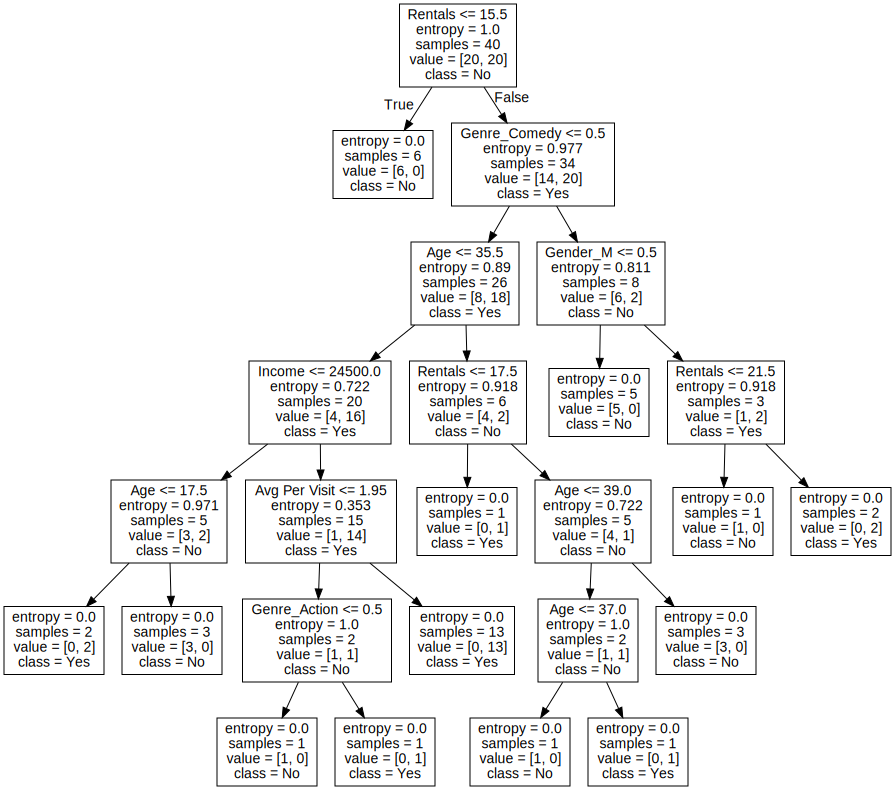

In [29]:
export_graphviz(treeclf,out_file='tree.dot', feature_names=vs_train.columns, class_names=["No","Yes"])
# you can check out more options.
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

#### We can obtain summary results on how informative are each of the features in the data:

In [30]:
print("Feature Importances:\n{}".format(treeclf.feature_importances_))
indicies = np.argsort(treeclf.feature_importances_)[-3:]
print('Indicies of the top 3 most important arguments:', indicies)
print('Most important feature was: ', vs_matrix.columns[2]) # match that to your indicies.

Feature Importances:
[0.10708547 0.29172098 0.28557041 0.08250975 0.         0.09338344
 0.05       0.08972995 0.        ]
Indicies of the top 3 most important arguments: [0 2 1]
Most important feature was:  Rentals


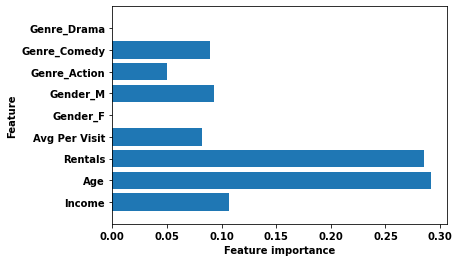

In [31]:
import pylab as plt
%matplotlib inline

def plot_feature_importances(model, n_features, feature_names):
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(treeclf, len(vs_matrix.columns), vs_matrix.columns)

<p>Here we see that Age is most important followed by Rentals and so on</p>

#### The above evaluation results indicate overfitting. Pruning the tree may help in reducing overfitting.

In [32]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=3)
cv_scores = model_selection.cross_val_score(treeclf, vs_matrix, vs_target, cv=5)
print (cv_scores)
print("Overall Accuracy on X-Val: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

treeclf = treeclf.fit(vs_train, vs_target_train)
print ("Accuracy on Training: ",  treeclf.score(vs_train, vs_target_train))

[0.7 0.6 0.7 0.6 0.7]
Overall Accuracy on X-Val: 0.66 (+/- 0.10)
Accuracy on Training:  0.85


<p>Now we have a slight decrease in the overfitting, it is not going all the way to 1.0 like before. It is a bit better though we still don't have a ot of data with 0.58 (+/- 0.29). Atleast, it isn't overfitting as much, which is not a big difference between what it is learning in training and testing  because it is not going to leaf of a single element of class. </p>

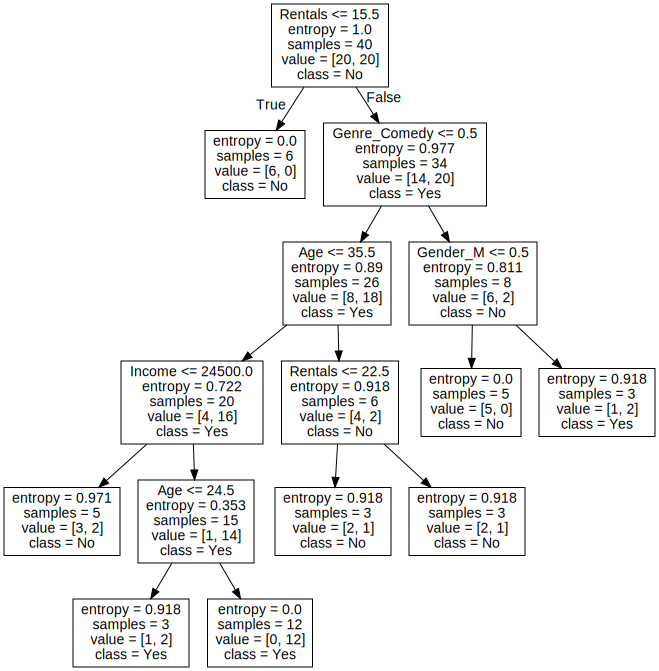

In [33]:
export_graphviz(treeclf,out_file='tree.dot', feature_names=vs_train.columns, class_names=["No","Yes"])

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [34]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4) # max dept means don't go to a tree that is deeper than 4
cv_scores = model_selection.cross_val_score(treeclf, vs_matrix, vs_target, cv=5)
print (cv_scores)
print("Overall Accuracy on X-Val: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

treeclf = treeclf.fit(vs_train, vs_target_train)
print ("Accuracy on Training: ",  treeclf.score(vs_train, vs_target_train))

[0.5 0.6 0.8 0.5 0.7]
Overall Accuracy on X-Val: 0.62 (+/- 0.23)
Accuracy on Training:  0.9


In [35]:
<p>we get similar results, not so much difference. it isn't much different from the one we have before.</p>

SyntaxError: invalid syntax (Temp/ipykernel_10696/3787304760.py, line 1)

In [ ]:
export_graphviz(treeclf,out_file='tree.dot', feature_names=vs_train.columns, class_names=["No","Yes"])

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

<p>we can see the dept of the tree is 4. In terms of simplicity, this is better than to have to explain the previous tree.  <p>

In [ ]:
treeclf = tree.DecisionTreeClassifier(criterion='gini', min_samples_leaf=3, max_depth=4)
cv_scores = model_selection.cross_val_score(treeclf, vs_matrix, vs_target, cv=5)
print (cv_scores)
print("Overall Accuracy on X-Val: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

treeclf = treeclf.fit(vs_train, vs_target_train)
print ("Accuracy on Training: ",  treeclf.score(vs_train, vs_target_train))

<p>Our tree gets slightly better because we are pre-prunning. This is why we cross validate with multiple parameters several times. </p>

In [ ]:
export_graphviz(treeclf,out_file='tree.dot', feature_names=vs_train.columns, class_names=["No","Yes"], filled=True) # filled = true introduces color

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

<p>This is our better tree and less overfit tree.</p>